# Appendix B: pyMICA class application

In this example we will show how to obtain interpolated fields considering clusters or not. In this case data from the automatic weather station network of the Meteorological Service of Catalonia (SMC) will be used. Particularly, data from 31st December 2018, which corresponds to a persitent fog situation.

The interpolated fields are obtained through the application of the main class of the pyMICA library, PyMica. Therefore, we import it:

In [1]:
from pymica.pymica import PyMica

PyMica class receives four parameters:

   - data_file: The path of the .json file with the point data
   - variables_file: A list of the file(s) path(s) containing the fields of the explanatory variables used in the regression. For more information on these fields, please see [Explanatory data](../preprocessing/pre_processing.ipynb) section.
   - clusters: A dictionary with two keys {'clusters_files': path for the clusters definitions, 'mask files': path for the rasterized clusters}. Form more information on these fields, please see [Clusters](../preprocessing/pre_processing.ipynb) section.
   - data_format: A dictionary with the name of the variables in the data file if they are not named as the default option. Defaults to ```{'loc_vars': ('lon', 'lat'), 'id_key': 'id', 'y_var': 'temp', 'x_vars': ('altitude', 'dist')}```
   - residuals_int: The residuals interpolation methodology, which can be `id2d` (default), `id3d` and `idw`.  


### Appendix B.1: Preparation of PyMica class parameters

From the four parameters above, three of them are the same either clusters are considered or not (`data_file`, `variables_file` and `data_format`). Therefore, we define them before explaining how to obtain the interpolated fields with and without clusters.

For the interpolation we will consider two explanatory variables: altitude and distance to coast. But first, we define the path to the file containing the data.

In [2]:
data_file = 'data/observations/xema_20181231_1400.json'

The first element of `xema_20181231_1400.json` is the following:
```json
   {"id": "C6", "temp": 2.1, "hr": 93.0, "tdew": 1.1, "altitude": 264.0, "lat": 41.6566, "lon": 0.95172, "dist": 0.8590799662714769}
```

Now, we define the paths of the altitude and distance to coast explanatory fields:

In [3]:
variables_files = ['data/explanatory/cat_dem_25831.tif', 'data/explanatory/cat_distance_coast.tif']

Since `loc_vars` are `lon` and `lat`, the `id_key` is `id`, the variable to interpolate is air temperature and it is labelled as the default (`temp`) and the explanatory variables are also the default ones, we can set the `data_format` parameter to `None`.

In [4]:
data_format = None

Finally, we select the residuals interpolation methodology. In this case we chose the inverse of the 3D distance, `id3d`.

In [5]:
residuals_int = 'id3d'

Now, we have initializated the three parameters that are common for the interpolation process that will be described below, either with or without clusters.

### Appendix B.2: Interpolation without clusters

In this interpolation process, no clusters will be considered. Therefore, the `clusters` parameter will be set to `None`.

In [6]:
clusters = None

Now, we call the PyMica class and save the result into what we called `global_int`:

In [7]:
global_int = PyMica(data_file, variables_files, clusters, data_format, residuals_int)

We save the interpolated field into a .tif file calling the `save_file` function of `PyMica` class and specifying the output path.

In [8]:
global_int.save_file('output/tair_20181231_1400_noclusters.tif')

And we can also plot the interpolated field using the `plot_interpolation` function, specifically built for this example, which requires the path of the interpolated raster file and specifying the interpolated variable, in this case `temp`:

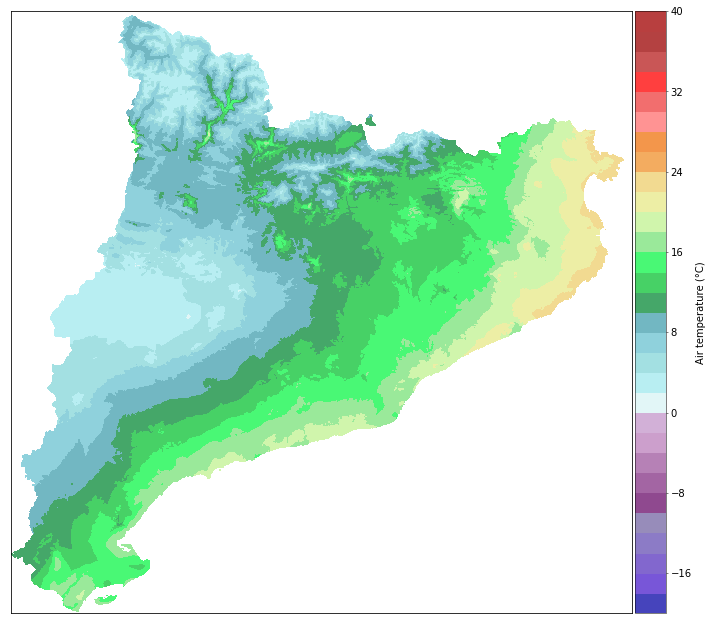

In [10]:
from plot_interpolation import plot_interpolation
plot_interpolation('output/tair_20181231_1400_noclusters.tif', 'temp')

### Appendix B.3: Interpolation with clusters

In this interpolation process, 3 and 6 clusters will be considered. Therefore, the `clusters` parameter will be set accordingly by defining the paths to the polygons and their rasters.

In [11]:
clusters = {'clusters_files': ['clusters/clusters-3.json', 'clusters/clusters-6.json'], 
            'mask_files': ['clusters/rasterized-clusters-3', 'clusters/rasterized-clusters-6']}

Now, we call the PyMica class and save the result into what we called `clusters_int`:

In [12]:
clusters_int = PyMica(data_file, variables_files, clusters, data_format, residuals_int)

We save the interpolated field into a .tif file calling the `save_file` function of `PyMica` class and specifying the output path.

In [13]:
clusters_int.save_file('output/tair_20181231_1400_clusters.tif')

And we can also plot the interpolated field using the `plot_interpolation` function, specifically built for this example, which requires the path of the interpolated raster file and specifying the interpolated variable, in this case `temp`:

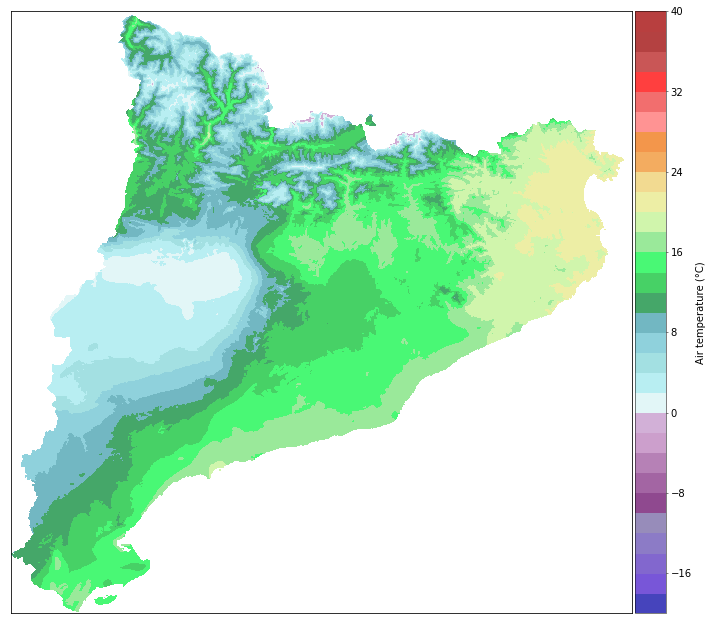

In [14]:
from plot_interpolation import plot_interpolation
plot_interpolation('output/tair_20181231_1400_clusters.tif', 'temp')